In [6]:
import pandas as pd

In [7]:
cd ..

/home/akshay/work/NLP/fake_news_classifier


In [8]:
data = pd.read_csv('fakenewsdata/train.csv')
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [9]:
# get the independenet variabls

X = data.drop('label' , axis=1)
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [10]:
# get dpendent varible
y = data['label']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [11]:
data.shape

(20800, 5)

In [12]:
data = data.dropna()

In [13]:
data.shape

(18285, 5)

In [14]:
messages = data.copy()
messages.tail()

,id,title,author,text,label
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1
20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1


In [15]:
messages.reset_index(inplace=True)
messages.tail()

,index,id,title,author,text,label
18280,20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
18281,20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
18282,20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
18283,20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1
18284,20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1


In [16]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re


obj_stem = PorterStemmer()

In [17]:
corpus = []

for i in range(len(messages)):
    review = re.sub('[^a-zA-Z]'," ",messages['title'][i])
    review = review.lower()

    # if do the split to a sentece it will create a list of words 
    review = review.split()
    
    # passing the stemming to find reduce the word length and find the commond meaning less word
    review = [obj_stem.stem(word) for word in review if word not in stopwords.words('english')]

    # joining the list of words to a single sentence
    review = ' '.join(review)
    
    # joining all the sentece to a sigle list
    corpus.append(review)
    # print

## Applying CountVectorize(Bag of words)

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
CV = CountVectorizer(max_features=4000,ngram_range=(1,3))
X = CV.fit_transform(corpus).toarray()

In [20]:
# after we put the max_features= 4000 the shape is changed from (18285,5) to (18285,40000)
X.shape

(18285, 4000)

In [21]:
y = messages['label']
y.head(10)

0    1
1    0
2    1
3    1
4    1
5    0
6    0
7    0
8    0
9    0
Name: label, dtype: int64

## Dividing the dataset to train and test

In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [23]:
print('X_train shape >>>> : ',X_train.shape)
print('X_test shape >>>> : ',X_test.shape)
print('y_train shape >>>> : ',y_train.shape)
print('y_test shape >>>> : ',X_test.shape)

X_train shape >>>> :  (14628, 4000)
X_test shape >>>> :  (3657, 4000)
y_train shape >>>> :  (14628,)
y_test shape >>>> :  (3657, 4000)


In [24]:
CV.get_feature_names_out()[:50]

array(['abandon', 'abc', 'abc news', 'abduct', 'abe', 'abedin', 'abort',
       'abroad', 'absolut', 'abus', 'abus new', 'abus new york', 'accept',
       'access', 'access pipelin', 'access pipelin protest', 'accident',
       'accord', 'account', 'accus', 'acknowledg', 'acquit', 'across',
       'act', 'act new', 'act new york', 'action', 'activ', 'activist',
       'actor', 'actual', 'ad', 'adam', 'add', 'addict', 'address',
       'adhd', 'admin', 'administr', 'admir', 'admit', 'adopt', 'adult',
       'advanc', 'advertis', 'advic', 'advis', 'advisor', 'advoc',
       'affair'], dtype=object)

In [25]:
CV.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 4000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [26]:
count_df = pd.DataFrame(X_train,columns=(CV.get_feature_names_out()))
count_df.head(20)

,abandon,abc,abc news,abduct,abe,abedin,abort,abroad,absolut,abus,...,youtub,zealand,zero,zika,zika viru,zionist,zone,zone new york,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
import matplotlib.pyplot as plt

In [28]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## multinomial Navie Bayes classifier algorithm

In [29]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [30]:
from sklearn import metrics
import numpy as np
import itertools

In [45]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

accuracy score >>>>>>>> :  0.9007383100902379
Confusion matrix, without normalization


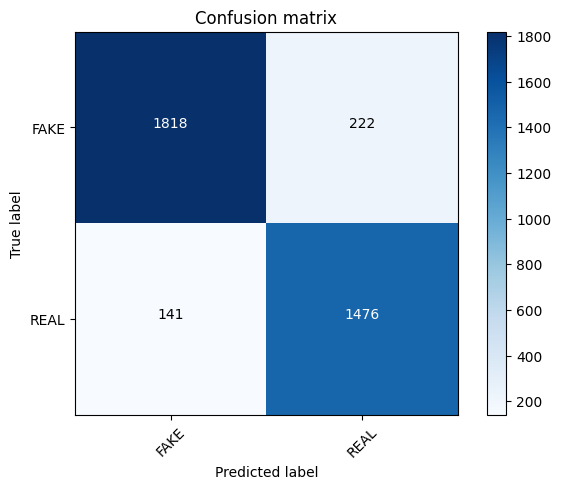

In [33]:
classifier.fit(X_train,y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test,pred)
print('accuracy score >>>>>>>> : ',score)
cm = metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm, classes=['FAKE','REAL'])

### mulitnomialNB with hyperparameter

In [42]:
mnb_classifier = MultinomialNB(alpha=0.1)


In [44]:

previous_score = 0
for alpha in np.arange(0,1,0.1):
    # print('alpha : ',alpha)
    sub_classifier = MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred = sub_classifier.predict(X_test)
    accuray_score = metrics.accuracy_score(y_test,y_pred)
    if score > previous_score:
        mnb_classifier = sub_classifier
    print(f'Alpha :{alpha}  ,  Score :{accuray_score}')
    

# in this way we can do the hyperparameter turning

/home/akshay/anaconda3/envs/pyNlp/lib/python3.12/site-packages/sklearn/naive_bayes.py:890: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/home/akshay/anaconda3/envs/pyNlp/lib/python3.12/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Alpha :0.0  ,  Score :0.5578342904019689
Alpha :0.1  ,  Score :0.9012852064533771
Alpha :0.2  ,  Score :0.9004648619086683
Alpha :0.30000000000000004  ,  Score :0.9010117582718075
Alpha :0.4  ,  Score :0.9012852064533771
Alpha :0.5  ,  Score :0.9018321028165163
Alpha :0.6000000000000001  ,  Score :0.9010117582718075
Alpha :0.7000000000000001  ,  Score :0.9015586546349467
Alpha :0.8  ,  Score :0.9018321028165163
Alpha :0.9  ,  Score :0.9012852064533771


In [54]:
import joblib
joblib.dump(mnb_classifier,'models/mulitnomiabNB_fakenews_classifer.pkl')

['models/mulitnomiabNB_fakenews_classifer.pkl']

## Passsive aggressive clasfifier algorithm

In [38]:
from sklearn.linear_model import PassiveAggressiveClassifier
pa_classifier = PassiveAggressiveClassifier(n_iter_no_change=50)

accuracy score >>>>> :  0.9127700300793
Confusion matrix, without normalization


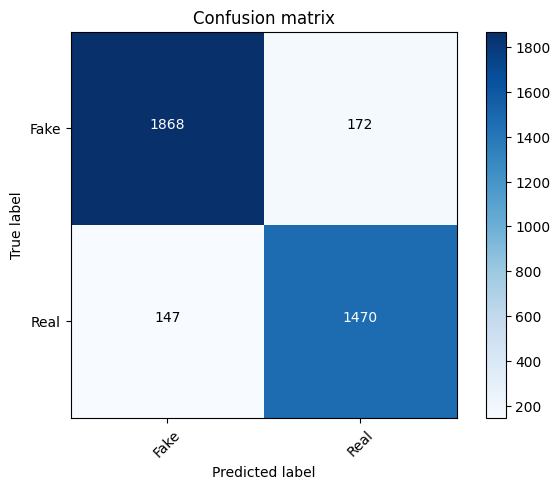

In [40]:
pa_classifier.fit(X_train,y_train)
y_pred = pa_classifier.predict(X_test)
accuray_score = metrics.accuracy_score(y_test,y_pred)
print('accuracy score >>>>> : ',accuray_score)
cm = confusion_metrice = metrics.confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm , classes=['Fake','Real'])

In [46]:
import joblib

In [53]:
#save the model to loacllly
joblib.dump(pa_classifier,'models/passive_regrassive_fakenew_classifer.pkl')

['models/passive_regrassive_fakenew_classifer.pkl']

In [47]:
pwd

'/home/akshay/work/NLP/fake_news_classifier'

In [48]:
mkdir models